In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
sns.set_style('whitegrid')

In [2]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_images[0].shape

(32, 32, 3)

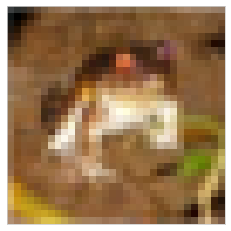

In [8]:
plt.imshow(train_images[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [9]:
train_labels[0]

array([6], dtype=uint8)

In [10]:
train_labels[0][0]

6

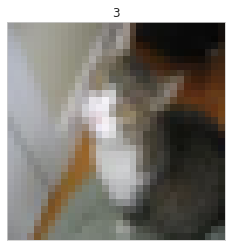

In [11]:
plt.imshow(train_images[101])
plt.title(train_labels[101][0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

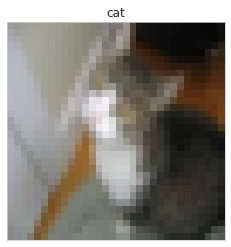

In [13]:
plt.imshow(train_images[101])
plt.title(class_names[train_labels[101][0]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

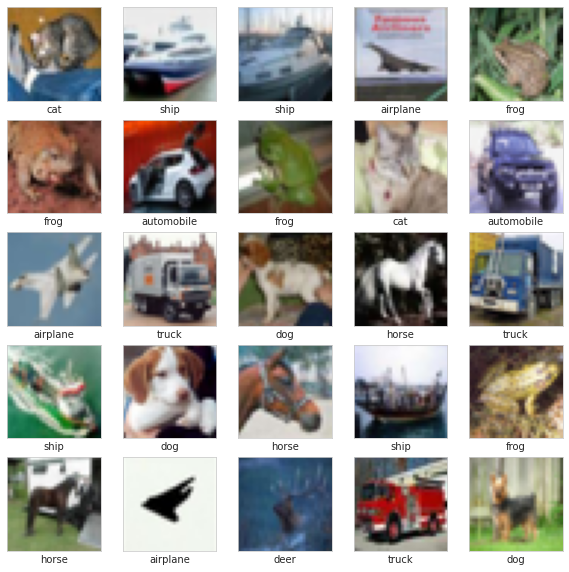

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [15]:
train_images,test_images = train_images / 255.0, test_images / 255.0

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [18]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [19]:
history = model.fit(train_images,train_labels,epochs=40,
                   validation_data=(test_images,test_labels))

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 20s 6ms/step - loss: 1.5181 - accuracy: 0.4449 - val_loss: 1.3763 - val_accuracy: 0.5139
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1471 - accuracy: 0.5946 - val_loss: 1.0498 - val_accuracy: 0.6275
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0012 - accuracy: 0.6463 - val_loss: 0.9813 - val_accuracy: 0.6605
Epoch 4/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9082 - accuracy: 0.6818 - val_loss: 0.9377 - val_accuracy: 0.6763
Epoch 5/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8404 - accuracy: 0.7075 - val_loss: 0.9264 - val_accuracy: 0.6823
Epoch 6/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7821 - accuracy: 0.7265 - val_loss: 0.9105 - val_accuracy: 0.6921
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7316 - accuracy: 0.7434 - val_loss: 0.8734 - val_accuracy: 0.7030

In [20]:
history.history


{'loss': [1.5181299448013306,
  1.147123098373413,
  1.0012325048446655,
  0.9081763029098511,
  0.8403986692428589,
  0.7821238040924072,
  0.7316116690635681,
  0.6897758841514587,
  0.6522834897041321,
  0.6184790730476379,
  0.580493688583374,
  0.5553162097930908,
  0.5252308249473572,
  0.49948251247406006,
  0.4715621769428253,
  0.44409579038619995,
  0.42137154936790466,
  0.40429237484931946,
  0.3800477087497711,
  0.3538650870323181,
  0.3436223864555359,
  0.3193812966346741,
  0.3005119264125824,
  0.28534096479415894,
  0.2758149206638336,
  0.2577629089355469,
  0.2499735951423645,
  0.2353794127702713,
  0.22433778643608093,
  0.21212638914585114,
  0.2077714502811432,
  0.1987113207578659,
  0.1904047280550003,
  0.19050127267837524,
  0.17256209254264832,
  0.17126739025115967,
  0.16944009065628052,
  0.16048049926757812,
  0.1644911915063858,
  0.15607711672782898],
 'accuracy': [0.44492000341415405,
  0.5946000218391418,
  0.6462799906730652,
  0.6818000078201294,

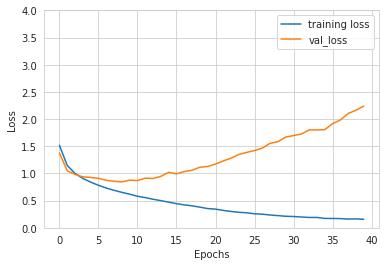

In [21]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 4])

plt.legend(loc=0)
plt.show()

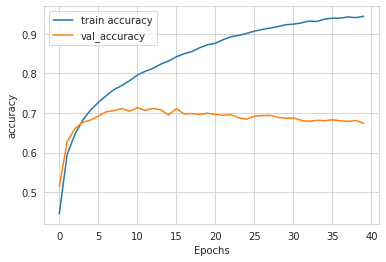

In [22]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.ylim([0, 2])

plt.legend(loc=0)
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.2396 - accuracy: 0.6739


In [24]:
test_loss

2.2396419048309326

In [25]:
test_acc

0.6739000082015991

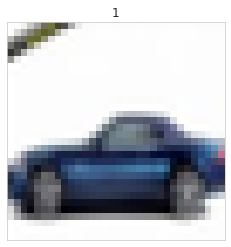

In [26]:
plt.imshow(test_images[105])
plt.title(test_labels[105][0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [27]:
model.predict(test_images[105].reshape(1,32,32,3)).round(2)

1/1 [==============================] - 0s 230ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
np.argmax(model.predict(test_images[105].reshape(1,32,32,3)))

1/1 [==============================] - 0s 77ms/step


1

In [29]:
class_names[np.argmax(model.predict(test_images[105].reshape(1,32,32,3)))]

1/1 [==============================] - 0s 25ms/step


'automobile'